In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import stats

# File to Load
xlsx = "./states_and_coefs.xlsx"

# Read Data File and store into Pandas Data Frames
df1 = pd.read_excel(xlsx, "state_data")
df2 = pd.read_excel(xlsx, "qoi_coefs")
coef = pd.DataFrame(df2)

In [2]:
# Define variables 
states = df1['State']
population = df1['total_pop']
# unemployment_rate = df1['unemployment_rate']/100
unemployment_rate = df1['unemployment_rate'] # changed above divison to maintain %age number
life_expec = df1['overall_life_expec']
divorce_rate = df1['Divorce_rate']
ea_high_school = df1['high_scool_percent']/100
ea_college = df1 ['college_percent']/100
gdp = df1['GDP']
pol_freedom = df1['Politcial_freedom']
latitude = df1['Latitude']
religion = df1['percent_religious']
earning_ratio = df1['earning_ratio_gender']
political_freedom = df1['human_freedom']

df_formatted = pd.DataFrame(
                {'States' : states,
                'Populations': population,
                'GDP per person': gdp,
                "High Scool Grad" : ea_high_school,
                "College Grad" : ea_college,
                'Life Expectancy': life_expec,
                'Political Freedom': pol_freedom,
                'Job Security (Unemployment %age)':unemployment_rate,
                'Divorce Rate': divorce_rate,
                'Climate': latitude,
                'Political Stability' : political_freedom,
                'Gender equality' : earning_ratio,
                'Community Life' : religion})
df_formatted.head()

,States,Populations,GDP per person,High Scool Grad,College Grad,Life Expectancy,Political Freedom,Job Security (Unemployment %age),Divorce Rate,Climate,Political Stability,Gender equality,Community Life
0,Alabama,4874747,37508,0.821,0.219,75.35,1.5,5.8,3.7,32.806671,8.39,0.760,0.77
1,Alaska,739795,63610,0.910,0.279,78.05,1.5,7.6,3.6,61.370716,8.39,0.768,0.45
2,Arizona,7016270,39583,0.856,0.259,80.00,1.5,5.8,3.5,33.729759,8.39,0.818,0.53
3,Arkansas,3004279,36714,0.829,0.195,76.05,1.5,5.6,3.7,34.969704,8.39,0.750,0.70
4,California,39536653,60359,0.807,0.301,80.45,1.5,5.9,5.5,36.116203,8.39,0.840,0.49


In [3]:
max(df_formatted["Divorce Rate"])

5.5

In [4]:
min(df_formatted["Divorce Rate"])

1.9

In [5]:
# Not sure what this number is or why its here
2.62

2.62

In [6]:
# Calculating "Family Life" : divorce rate index 
# Bins
divorce_bins = [1.8, 2.62, 3.34, 4.06, 4.78, 5.6]
group_names = ["1", "2", "3", "4", "5"]

# Rename dataframe
bin_pd = df_formatted

# Segment and sort data into buckets by Per Student Budget
bin_pd["Divorce Rate I"] = pd.cut(bin_pd["Divorce Rate"], divorce_bins, labels=group_names)

In [7]:
#df_new = bin_pd.drop(columns=['Divorce Rate'])
df_new1 = pd.DataFrame(bin_pd)
df_new1.sort_values("Job Security (Unemployment %age)", axis=0, ascending=True)

,States,Populations,GDP per person,High Scool Grad,College Grad,Life Expectancy,Political Freedom,Job Security (Unemployment %age),Divorce Rate,Climate,Political Stability,Gender equality,Community Life,Divorce Rate I
34,North Dakota,755393,64911,0.903,0.276,79.35,1.5,2.9,2.5,47.528912,8.39,0.758,0.53,1
27,Nebraska,1920076,54654,0.904,0.286,79.50,1.5,3.3,3.0,41.125370,8.39,0.731,0.54,2
26,Montana,1050493,39833,0.917,0.288,78.55,1.5,3.5,3.1,46.921925,8.39,0.752,0.48,2
41,South Dakota,869666,48004,0.896,0.263,79.60,1.5,3.5,2.7,44.299782,8.39,0.769,0.59,2
49,Wisconsin,5795483,48666,0.901,0.263,79.90,1.5,3.5,2.4,44.268543,8.39,0.783,0.45,1
23,Minnesota,5576606,54805,0.918,0.318,80.90,1.5,3.6,3.2,45.694454,8.39,0.800,0.49,2
44,Utah,3101833,45493,0.906,0.293,80.50,1.5,3.6,3.4,40.150032,8.39,0.700,0.64,3
15,Iowa,3145711,52284,0.906,0.249,79.45,1.5,3.6,2.0,42.011539,8.39,0.778,0.55,1
45,Vermont,623657,44831,0.910,0.336,80.60,1.5,3.8,2.9,44.045876,8.39,0.864,0.34,2
29,New Hampshire,1342795,52509,0.915,0.328,80.55,1.5,3.8,3.1,43.452492,8.39,0.769,0.33,2


In [8]:
coef

,weight,coef
0,Constant,2.79590
1,GDP,0.00003
2,Life_expectancy,0.04480
3,political_freedom,-0.10520
4,Job_security,-0.02170
5,Family_life,-0.18780
6,Climate,-1.35340
7,Political_stability,0.15190
8,Gender,0.74230
9,Community_life,0.38650


In [9]:
# Defining variable coefficients
constant = coef.iloc[0]["coef"]
gdp_coef = coef.iloc[1]["coef"]
life_coef = coef.iloc[2]["coef"]
polF_coef = coef.iloc[3]["coef"]
job_coef = coef.iloc[4]["coef"]
fam_coef = coef.iloc[5]["coef"]
clim_coef = coef.iloc[6]["coef"]
polS_coef = coef.iloc[7]["coef"]
genderE_coef = coef.iloc[8]["coef"]
community_coef = coef.iloc[9]["coef"]

QOL = constant + (gdp_coef * df_new1["GDP per person"])\
               + (life_coef * df_new1["Life Expectancy"]) +  (polF_coef * df_new1["Political Freedom"])\
               + (job_coef * df_new1["Job Security (Unemployment %age)"]) + (fam_coef * df_new1["Divorce Rate I"].astype(int))\
               + (genderE_coef * df_new1["Gender equality"])+ (genderE_coef * df_new1["Gender equality"])\
               +(community_coef * df_new1["Community Life"]) + (clim_coef * stats.zscore(df_new1["Climate"]))
QOL
    

0      9.375082
1      3.695592
2      9.431119
3      8.857945
4      9.176561
5      8.834444
6      8.437819
7      9.039448
8     12.173593
9     10.808392
10     9.721487
11    12.744850
12     6.884608
13     8.689045
14     8.267535
15     8.294131
16     8.871172
17     8.336379
18    10.162277
19     7.099327
20     9.142038
21     8.649503
22     7.443652
23     7.426997
24     9.371370
25     8.559147
26     6.523173
27     8.312106
28     8.271815
29     7.735126
30     8.834989
31     9.365157
32     8.565004
33     9.321117
34     7.403712
35     8.230286
36     8.815826
37     7.324404
38     8.480181
39     8.074638
40     9.628771
41     7.473605
42     9.080356
43    10.758214
44     8.100040
45     7.518297
46     9.041855
47     6.868857
48     7.908416
49     7.668415
50     7.778015
dtype: float64

In [10]:
from scipy.stats import stats

In [11]:
np.mean(QOL)

8.560311525490198

In [12]:
# Rename dataframe, add QOL and sort by QOL
df_new1["QOL"]=QOL
final_df = df_new1
final_df["High Scool Grad"] = final_df["High Scool Grad"] * 100
final_df["College Grad"] = final_df["College Grad"] * 100
final_df["Community Life"] = final_df["Community Life"] * 100
final_df["Gender equality"] = final_df["Gender equality"] * 100
final_df.sort_values(by='QOL', ascending=False)

,States,Populations,GDP per person,High Scool Grad,College Grad,Life Expectancy,Political Freedom,Job Security (Unemployment %age),Divorce Rate,Climate,Political Stability,Gender equality,Community Life,Divorce Rate I,QOL
11,Hawaii,1427538,52869,89.9,29.5,80.80,1.5,4.2,3.5,21.094318,8.39,83.3,47.0,3,12.744850
8,District of Columbia,693972,159607,87.4,50.1,77.10,1.5,6.6,2.5,38.897438,8.39,87.0,53.0,1,12.173593
9,Florida,20984400,39842,85.5,25.8,79.30,1.5,5.5,3.6,27.766279,8.39,85.0,54.0,3,10.808392
43,Texas,28304596,53737,80.7,25.9,78.35,1.5,5.1,2.2,31.054487,8.39,77.8,64.0,1,10.758214
18,Louisiana,4684333,44372,81.9,21.4,75.65,1.5,6.5,1.9,31.169546,8.39,66.7,71.0,1,10.162277
10,Georgia,10429379,45925,84.3,27.3,77.45,1.5,5.8,3.5,33.040619,8.39,82.4,66.0,3,9.721487
40,South Carolina,5024369,37637,84.1,24.5,77.10,1.5,5.8,2.6,33.856892,8.39,80.0,70.0,1,9.628771
2,Arizona,7016270,39583,85.6,25.9,80.00,1.5,5.8,3.5,33.729759,8.39,81.8,53.0,3,9.431119
0,Alabama,4874747,37508,82.1,21.9,75.35,1.5,5.8,3.7,32.806671,8.39,76.0,77.0,3,9.375082
24,Mississippi,2984100,32447,81.0,19.5,75.05,1.5,7.0,2.9,32.741646,8.39,75.0,77.0,2,9.371370


In [20]:
# Output the .csv
final_df.to_csv("education_df_output_csv.csv", sep=',', header=True)

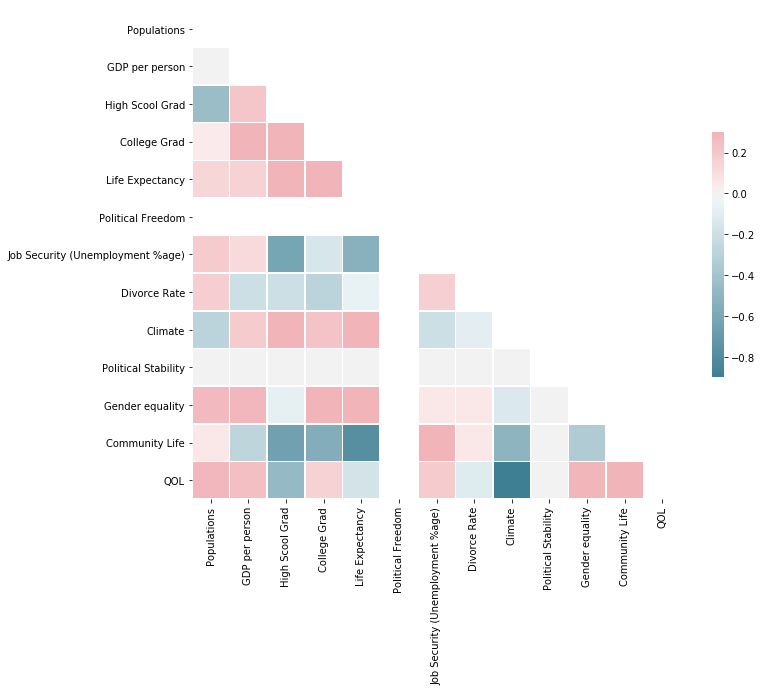

In [14]:
corr = final_df.corr()
import seaborn as sns

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.savefig("corr_heatmap.png")

In [15]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 15 columns):
States                              51 non-null object
Populations                         51 non-null int64
GDP per person                      51 non-null int64
High Scool Grad                     51 non-null float64
College Grad                        51 non-null float64
Life Expectancy                     51 non-null float64
Political Freedom                   51 non-null float64
Job Security (Unemployment %age)    51 non-null float64
Divorce Rate                        51 non-null float64
Climate                             51 non-null float64
Political Stability                 51 non-null float64
Gender equality                     51 non-null float64
Community Life                      51 non-null float64
Divorce Rate I                      51 non-null category
QOL                                 51 non-null float64
dtypes: category(1), float64(11), int64(2), object(1)
memory 

In [16]:
import statsmodels.api as sm # import statsmodels 

# OLS Regression analysis

X = final_df["College Grad"] ## X usually means our input variables (or independent variables)
y = final_df["QOL"] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    QOL   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.149
Date:                Sat, 30 Mar 2019   Prob (F-statistic):              0.289
Time:                        15:23:12   Log-Likelihood:                -88.277
No. Observations:                  51   AIC:                             180.6
Df Residuals:                      49   BIC:                             184.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            7.5292      0.982      7.670      0.000       5.557       9.502
College Grad     0.0369      0.034      1.072      0.289      -0.032       0.106
==============================================================================
Omnibus:                        8.421   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.015   Jarque-Bera (JB):               17.425
Skew:                          -0.128   Prob(JB):                     0.000165
Kurtosis:                       5.852   Cond. No.                         144.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

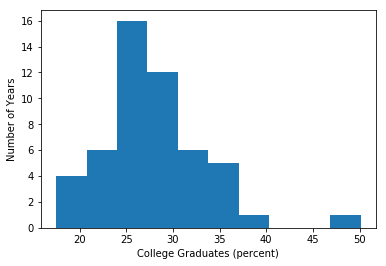

In [17]:
plt.hist(final_df["College Grad"])
plt.ylabel("Number of Years")
plt.xlabel("College Graduates (percent)")
plt.savefig("hist_coll_grad.png")

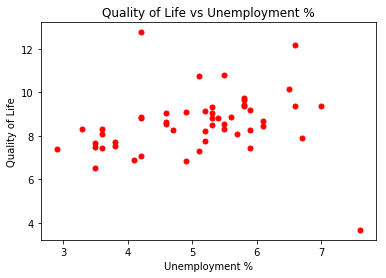

In [17]:
qol = final_df["QOL"]
unempl = final_df["Job Security (Unemployment %age)"]
plt.scatter(unempl,qol,s=25,color="red")
plt.ylabel("Quality of Life")
plt.xlabel("Unemployment %")
plt.title("Quality of Life vs Unemployment %")
plt.savefig("QolvUnempl.png")

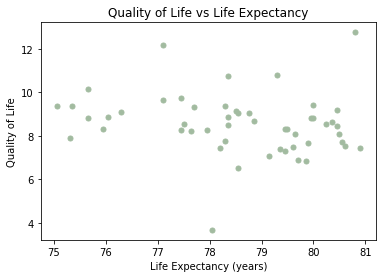

In [18]:

life_exp = final_df["Life Expectancy"]
plt.scatter(life_exp,qol,s=25,color="#a2bba0")
plt.ylabel("Quality of Life")
plt.xlabel("Life Expectancy (years)")
plt.title("Quality of Life vs Life Expectancy")

plt.savefig("QolvLifeExp.png")

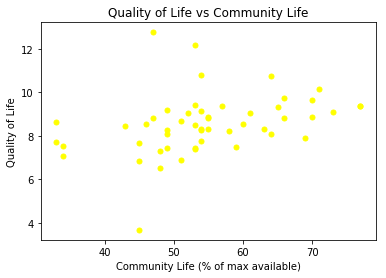

In [19]:
comm_life = final_df["Community Life"]
plt.scatter(comm_life,qol,s=25,color="yellow")
plt.ylabel("Quality of Life")
plt.xlabel("Community Life (% of max available)")
plt.title("Quality of Life vs Community Life")
plt.savefig("QolvCommLife.png")

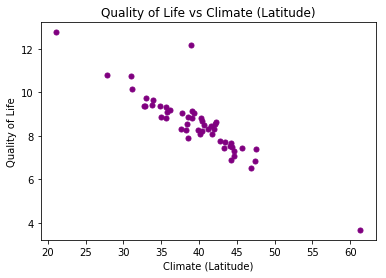

In [20]:
climate = final_df["Climate"]
plt.scatter(climate,qol,s=25,color="purple")
plt.ylabel("Quality of Life")
plt.xlabel("Climate (Latitude)")
plt.title("Quality of Life vs Climate (Latitude)")
plt.savefig("QolvClimate.png")

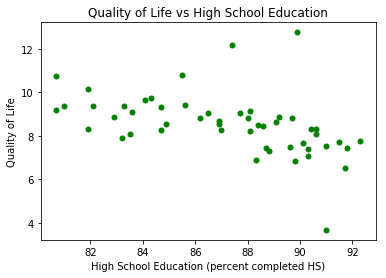

In [21]:
hseduc = final_df["High Scool Grad"]
plt.scatter(hseduc,qol,s=25,color="green")
plt.ylabel("Quality of Life")
plt.xlabel("High School Education (percent completed HS)")
plt.title("Quality of Life vs High School Education")
plt.savefig("QolvHSeduc.png")

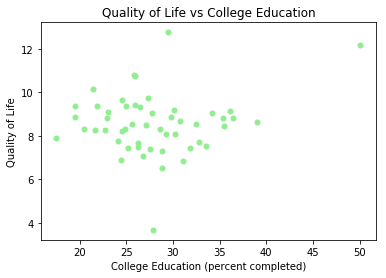

In [22]:
college_educ = final_df["College Grad"]
plt.scatter(college_educ,qol,s=25,color="lightgreen")
plt.ylabel("Quality of Life")
plt.xlabel("College Education (percent completed)")
plt.title("Quality of Life vs College Education")
plt.savefig("QolvColEduc.png")

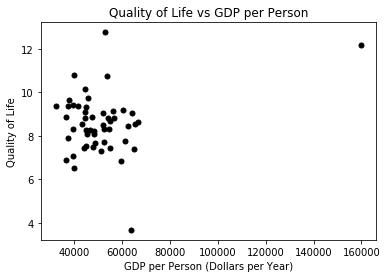

In [23]:
gdp_pp = final_df["GDP per person"]
plt.scatter(gdp_pp,qol,s=25,color="black")
plt.ylabel("Quality of Life")
plt.xlabel("GDP per Person (Dollars per Year)")
plt.title("Quality of Life vs GDP per Person")
plt.savefig("QolvGDP.png")

In [24]:
## Begin Jonas Choropeth...

In [25]:
#JH - Adding postal code for plotly map
final_df["postal"] = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']


In [26]:
#JH - Plotly Dependencies

import plotly.plotly as py
import plotly.graph_objs as go
import plotly.tools as tls

# If the map plot fails...
# Comment this next line
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# and uncomment this next line
# tls.set_credentials_file(username='jonas.haskins', api_key='oS0BOsrPdPS8HqyGao12')
# and that may causde it to owrk, but we don't know why

In [27]:
data = [dict(type='choropleth',autocolorscale=False, locations = final_df['postal'], z = final_df["QOL"],locationmode='USA-states', colorscale = 'Jet', colorbar = dict(title="Quality of Life Index"))]

In [28]:
layout = go.Layout(
    title = go.layout.Title(
        text = 'QoL by State'
    ),
    geo = go.layout.Geo(
        scope = 'usa',
        projection = go.layout.geo.Projection(type = 'albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)'),
)

In [29]:
fig = dict(data=data, layout=layout)

In [30]:
py.iplot(fig, filename='d3-choropleth-map')
# plt.savefig("choropleth.png")

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~jonas.haskins/0 or inside your plot.ly account where it is named 'd3-choropleth-map'


C:\Users\Michel Maniguet\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [31]:
pwd

'C:\\Users\\Michel Maniguet\\Desktop\\Team_5_Project_1'